# Part I. Topic Modelling and Analysis

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

### Text preprocessing

In [44]:
# Loading en_core_web_md
!py -m spacy download en_core_web_md

C:\Users\Rizabek\AppData\Local\Programs\Python\Python39\python.exe: No module named spacy


In [3]:
df = pd.read_csv("../dso-560-nlp-text-analytics-main/datasets/mcdonalds-yelp-negative-reviews.csv", encoding='latin-1')
df.head()

,_unit_id,city,review
0,679455653,Atlanta,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,Atlanta,Terrible customer service. I came in at 9:30pm...
2,679455655,Atlanta,"First they ""lost"" my order, actually they gave..."
3,679455656,Atlanta,I see I'm not the only one giving 1 star. Only...
4,679455657,Atlanta,"Well, it's McDonald's, so you know what the fo..."


In [4]:
# lemitization using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

In [5]:
# lower case
df['review'] = df['review'].apply(lambda x: x.lower())

In [6]:
# manually replace some MCDonalds
df["cleaned_review"] = df["review"].str.replace(r'\b(mcdonald\'?s?|mcds?)\b', 'McDonalds', case=False, regex=True)

# manually replace some drive through
df["cleaned_review"] = df["cleaned_review"].str.replace(r'\b(drive-? ?thro?uh?s?|Drive-? ?Through)\b', 'DriveThrough', case=False, regex=True)

# manually replace time 
df["cleaned_review"] = df["cleaned_review"].str.replace(r'(\d+):(\d+) ?[am|pm]*', 'TIME', case=False, regex=True)


In [7]:
df.head(20)

,_unit_id,city,review,cleaned_review
0,679455653,Atlanta,"i'm not a huge mcds lover, but i've been to be...","i'm not a huge McDonalds lover, but i've been ..."
1,679455654,Atlanta,terrible customer service. i came in at 9:30pm...,terrible customer service. i came in at TIME a...
2,679455655,Atlanta,"first they ""lost"" my order, actually they gave...","first they ""lost"" my order, actually they gave..."
3,679455656,Atlanta,i see i'm not the only one giving 1 star. only...,i see i'm not the only one giving 1 star. only...
4,679455657,Atlanta,"well, it's mcdonald's, so you know what the fo...","well, it's McDonalds, so you know what the foo..."
5,679455658,Atlanta,this has to be one of the worst and slowest mc...,this has to be one of the worst and slowest Mc...
6,679455659,Atlanta,i'm not crazy about this mcdonald's. this is p...,i'm not crazy about this McDonalds. this is pr...
7,679455660,Atlanta,one star and i'm beng kind. i blame management...,one star and i'm beng kind. i blame management...
8,679455661,Atlanta,never been upset about any fast food drive thr...,never been upset about any fast food DriveThro...
9,679455662,Atlanta,this mcdonald's has gotten much better. usuall...,this McDonalds has gotten much better. usually...


In [8]:
# remove "not" from Spacy default stopwords
nlp = spacy.load("en_core_web_md")
nlp.Defaults.stop_words -= {"not"}

In [9]:
# create function for lemmitization
def lemmatize(text):
    spacy_doc = nlp(text)
    review = []
    for token in spacy_doc:
        if token.is_stop: # don't include stop words.The Spacy library has a default list of 326 stopwords
            continue
        else:
            review.append(token.lemma_)
            lemmatized = " ".join(review)
    return lemmatized

In [10]:
# lemmitize review
for i in range(len(df)):
    df.loc[i, 'cleaned_review'] = lemmatize(df.loc[i,'cleaned_review'])

In [ ]:
# install library
!pip install textacy

In [12]:
# text preprocessing using textacy
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols
df["cleaned_review"] = df.cleaned_review.\
  apply(urls).\
  apply(hashtags).\
  apply(numbers).\
  apply(currency_symbols).\
  apply(emojis).\
  apply(emails)
df.head(5)

,_unit_id,city,review,cleaned_review
0,679455653,Atlanta,"i'm not a huge mcds lover, but i've been to be...","huge McDonalds lover , well one . far bad ! fi..."
1,679455654,Atlanta,terrible customer service. i came in at 9:30pm...,terrible customer service . come TIME stand re...
2,679455655,Atlanta,"first they ""lost"" my order, actually they gave...",""" lose "" order , actually give take _NUMBER_ m..."
3,679455656,Atlanta,i see i'm not the only one giving 1 star. only...,give _NUMBER_ star . _NUMBER_ star ! ! ! need !
4,679455657,Atlanta,"well, it's mcdonald's, so you know what the fo...",", McDonalds , know food . review reflect solel..."


In [13]:
# # removing the stopwords using gensim
# from gensim.parsing.preprocessing import remove_stopwords
# for i in range(len(df)):
#     df.loc[i, 'cleaned_review'] = remove_stopwords(df.loc[i, 'cleaned_review'])

In [14]:
df.head(5)

,_unit_id,city,review,cleaned_review
0,679455653,Atlanta,"i'm not a huge mcds lover, but i've been to be...","huge McDonalds lover , . far bad ! filthy insi..."
1,679455654,Atlanta,terrible customer service. i came in at 9:30pm...,terrible customer service . come TIME stand re...
2,679455655,Atlanta,"first they ""lost"" my order, actually they gave...",""" lose "" order , actually _NUMBER_ minute figu..."
3,679455656,Atlanta,i see i'm not the only one giving 1 star. only...,_NUMBER_ star . _NUMBER_ star ! ! ! need !
4,679455657,Atlanta,"well, it's mcdonald's, so you know what the fo...",", McDonalds , know food . review reflect solel..."


### Vectorizing

In [33]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2), max_features=700)


reviews, reviews_terms = vectorizer.fit_transform(df.cleaned_review), vectorizer.get_feature_names()


tf_idf = pd.DataFrame(reviews.toarray(), columns=reviews_terms)

print(f"TF-IDF: {tf_idf.shape}")

print(tf_idf.head(5))

TF-IDF: (1525, 700)
   2nd window  _cur_ _number_  _number_ _cur_  _number_ _number_  \
0         0.0             0.0             0.0                0.0   
1         0.0             0.0             0.0                0.0   
2         0.0             0.0             0.0                0.0   
3         0.0             0.0             0.0                0.0   
4         0.0             0.0             0.0                0.0   

   _number_ apple  _number_ big  _number_ breakfast  _number_ car  \
0             0.0           0.0                 0.0           0.0   
1             0.0           0.0                 0.0           0.0   
2             0.0           0.0                 0.0           0.0   
3             0.0           0.0                 0.0           0.0   
4             0.0           0.0                 0.0           0.0   

   _number_ cent  _number_ chance  ...  work nearby  work time  write review  \
0            0.0              0.0  ...          0.0        0.0           0.0

### Fit NMF Model

In [34]:
nmf = NMF(n_components=7)
W_reviews = nmf.fit_transform(reviews)
H_reviews = nmf.components_
print(f"Original shape of X sports is {reviews.shape}")
print(f"Decomposed W sports matrix is {W_reviews.shape}")
print(f"Decomposed H sports matrix is {H_reviews.shape}")

Original shape of X sports is (1525, 700)
Decomposed W sports matrix is (1525, 7)
Decomposed H sports matrix is (7, 700)


C:\Users\Rizabek\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [35]:
# code from classwork

from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

In [36]:
get_top_tf_idf_tokens_for_topic(H_reviews, tf_idf.columns.tolist(), 5)

TOPIC 0

_number_ _number_ (16.0%)

_number_ time (5.2%)

_number_ star (2.1%)

order wrong (1.4%)

mc donald (1.4%)

TOPIC 1

bad mcdonalds (22.4%)

mess order (1.9%)

far bad (1.8%)

horrible service (1.7%)

order wrong (1.5%)

TOPIC 2

customer service (17.4%)

bad customer (4.2%)

order wrong (1.5%)

terrible customer (1.2%)

avoid place (1.1%)

TOPIC 3

fast food (15.9%)

food place (2.1%)

food restaurant (1.7%)

food fast (1.5%)

late night (1.5%)

TOPIC 4

_number_ minute (13.9%)

wait _number_ (7.1%)

minute order (1.7%)

minute drivethrough (1.5%)

minute food (1.3%)

TOPIC 5

_cur_ _number_ (10.7%)

big mac (3.5%)

_number_ hour (3.2%)

chicken nugget (1.6%)

parking lot (1.3%)

TOPIC 6

ice cream (21.7%)

cream machine (4.7%)

cream cone (4.4%)

look like (3.2%)

mc donald (2.6%)



In [37]:
import numpy as np
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
            print("=" * 50)

In [38]:
get_top_documents_for_each_topic(W_reviews, df.review.tolist(), num_docs=5)

Topic 0
100.0% this mcdonald's is poorly ran. they always cean the bathrooms from 7:30 to 8:15 am . when they are busy. today my little girl 41/2 needed to go potty . i told the lady , that spoke very little english that my little had to go potty very bad . she just said sorry . we had to go to subway . i yes you guess right . my little girl did not make it in time :( they can kiss it . we ill not be back and we will tell everybody not to go to this loction
100.0% do not go in. walk across the street & get a day old, shriveled up hot dog from the 7-11. just take my word for it.
100.0% this location has the new strawberry creme pies. the healthscore is a 93 as of 3/26/12.the drive thru cashier was really nice, but my fries were far too crispy too be any good.
100.0% walked by tonight on my neighborhood watch walk and there was a lady standing by the drive through speaker asking for $$.feb. 16, 2011 7:10pm
63.4% i star for the food. my drive-thru experience at 9:40ish pm 12/08/14 was -4.

### LSA (Latent Semantic Analysis)

In [39]:
from sklearn.decomposition import TruncatedSVD
K = 10

svd = TruncatedSVD(n_components=K)
U = svd.fit_transform(reviews)
V_star = svd.components_

In [40]:
svd.explained_variance_

array([0.00771007, 0.01172786, 0.01001223, 0.01002911, 0.00964695,
       0.00892909, 0.00761263, 0.00737135, 0.00674045, 0.00677413])

In [41]:
get_top_documents_for_each_topic(W_reviews, df.review.tolist(), num_docs=5)

Topic 0
100.0% this mcdonald's is poorly ran. they always cean the bathrooms from 7:30 to 8:15 am . when they are busy. today my little girl 41/2 needed to go potty . i told the lady , that spoke very little english that my little had to go potty very bad . she just said sorry . we had to go to subway . i yes you guess right . my little girl did not make it in time :( they can kiss it . we ill not be back and we will tell everybody not to go to this loction
100.0% do not go in. walk across the street & get a day old, shriveled up hot dog from the 7-11. just take my word for it.
100.0% this location has the new strawberry creme pies. the healthscore is a 93 as of 3/26/12.the drive thru cashier was really nice, but my fries were far too crispy too be any good.
100.0% walked by tonight on my neighborhood watch walk and there was a lady standing by the drive through speaker asking for $$.feb. 16, 2011 7:10pm
63.4% i star for the food. my drive-thru experience at 9:40ish pm 12/08/14 was -4.

In [42]:
get_top_tf_idf_tokens_for_topic(V_star, tf_idf.columns.tolist(), 5)

TOPIC 0

_number_ minute (3.1%)

_number_ _number_ (2.3%)

fast food (2.2%)

bad mcdonalds (2.2%)

_cur_ _number_ (1.7%)

TOPIC 1

bad mcdonalds (-179.3%)

customer service (-14.2%)

far bad (-14.0%)

mess order (-13.7%)

horrible service (-12.6%)

TOPIC 2

customer service (21.8%)

bad customer (5.3%)

_cur_ _number_ (3.8%)

big mac (2.4%)

order wrong (2.0%)

TOPIC 3

fast food (184.1%)

customer service (78.5%)

_number_ minute (24.8%)

wait _number_ (22.4%)

food restaurant (20.0%)

TOPIC 4

_number_ minute (-19.9%)

customer service (-13.4%)

wait _number_ (-9.2%)

bad customer (-3.1%)

minute order (-2.7%)

TOPIC 5

_cur_ _number_ (48.4%)

_number_ hour (17.9%)

_number_ minute (11.8%)

big mac (11.1%)

wait _number_ (6.2%)

TOPIC 6

ice cream (21.9%)

look like (5.3%)

cream machine (4.8%)

cream cone (4.2%)

big mac (3.7%)

TOPIC 7

big mac (13.8%)

_number_ star (7.8%)

chicken nugget (4.4%)

order wrong (4.4%)

look like (3.0%)

TOPIC 8

# Part II. multi-label classification

In [48]:
# loading datasets
df_test = pd.read_csv('https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/datasets/emotions/test.txt', header=None,names=['sentence', 'emotion'], delimiter=";")
df_train = pd.read_csv('https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/datasets/emotions/train.txt', header=None,names=['sentence', 'emotion'], delimiter=";")
df_val = pd.read_csv('https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/datasets/emotions/val.txt', header=None,names=['sentence', 'emotion'], delimiter=";")
df_test['df_type'] = 'test'
df_train['df_type'] = 'train'
df_val['df_type'] = 'train'
df = pd.concat([df_train, df_test, df_val])

(20000, 4)
['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


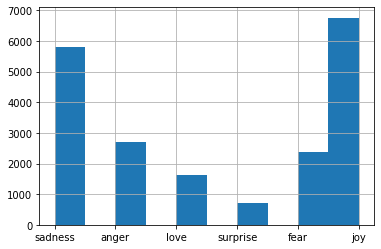

In [50]:
print(df.shape)
df.emotion.hist()
print(df_train.emotion.unique())

## Text preprocessing

In [45]:
import en_core_web_sm
import spacy
from scipy.spatial.distance import cosine
import spacy

# load the language model, but we disable the ner (named entity recognition) and parser (dependency parser)
# since we don't need them for our use case to speed things up
nlp = spacy.load('en_core_web_md', disable = ['ner', 'parser'])

In [46]:
# create function for lemmitization
def lemmatize(text):
    spacy_doc = nlp(text)
    review = []
    for token in spacy_doc:
      if token.is_stop: # don't include stop words.The Spacy library has a default list of 326 stopwords
        continue
      else:
        review.append(token.lemma_)
        lemmatized = " ".join(review)
    return lemmatized

In [49]:
# lemmitize
df['cleaned_sentence'] = df['sentence'].apply(lemmatize)

In [51]:
# checking the shape of df
print(df.shape)
df[df['df_type']=='train'].shape

(20000, 4)


(18000, 4)

## Create function for vectorizing and support vector classifier

In [72]:
# creating function for Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

def SVC_classifier(vectorizer):
    # vectorizing
    matrix = vectorizer.fit_transform(df.cleaned_sentence)
    
    #splitting dataset
    X_train = matrix[df['df_type']=='train']
    X_test = matrix[df['df_type']=='test']
    
    y_train = df.loc[df['df_type']=='train','emotion']
    y_test = df.loc[df['df_type']=='test','emotion']
    
    # training the model
    svm_model_linear = SVC(kernel = 'linear', C = 1, probability=True).fit(X_train, y_train)
    
    # make prediction on testing set 
    svm_predictions = svm_model_linear.predict(X_test)
    
    # calculate confusion matrix
    print(confusion_matrix(y_test, svm_predictions))
    
    # calculate accuracy
    print(f'Accuracy: {svm_model_linear.score(X_test, y_test)}')
    
    # calculate roc_auc
    y_probabilities = svm_model_linear.predict_proba(X_train)
    print(f'ROC_AUC: {roc_auc_score(y_train, y_probabilities, multi_class="ovo")}')
    
    #F1 Score
    print(f'{f1_score(y_test, svm_predictions, average=None)})

## Run SVC using CountVecorizer and TfIdfVectorizer

In [73]:
vectorizer = CountVectorizer(ngram_range=(3, 3))
SVC_classifier(vectorizer)

[[ 32   2 217   1  23   0]
 [  0  24 193   0   6   1]
 [  2   2 657   7  25   2]
 [  0   0 140   9  10   0]
 [  6   5 385   0 185   0]
 [  0   3  57   0   1   5]]
Accuracy: 0.456
ROC_AUC: 0.9991995264785775


In [74]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
SVC_classifier(vectorizer)

[[177   3  56   2  37   0]
 [  8 161  29   1  23   2]
 [  5   3 617  19  46   5]
 [  2   1  73  67  16   0]
 [ 15  10  91   4 460   1]
 [  0  17  13   0  11  25]]
Accuracy: 0.7535
ROC_AUC: 0.9999560918213491


In [84]:
# TfIdfVectorizer ngram (3,3)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
SVC_classifier(vectorizer)

[[148   2  78   0  47   0]
 [  7 148  41   0  26   2]
 [  1   1 643  13  35   2]
 [  0   0  92  53  14   0]
 [  7   4 111   0 459   0]
 [  0  14  27   0  11  14]]
Accuracy: 0.7325
ROC_AUC: 0.9994552221511444


In [75]:
# TfIdfVectorizer ngram (2,2)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
SVC_classifier(vectorizer)

[[148   2  78   0  47   0]
 [  7 148  41   0  26   2]
 [  1   1 643  13  35   2]
 [  0   0  92  53  14   0]
 [  7   4 111   0 459   0]
 [  0  14  27   0  11  14]]
Accuracy: 0.7325
ROC_AUC: 0.9994219469977658


###  SV classification using Word2Rec

In [76]:
# get the word2vec embeddings for the processed text (the average of each token in the doc's word2vec embeddings)
df_train['vectors'] = df_train.sentence.apply(lambda x: nlp(x).vector)
df_test['vectors'] = df_test.sentence.apply(lambda x: nlp(x).vector)

In [77]:
# create X and Y variables for training data
X_train = np.array([vector for vector in df_train["vectors"]])
y_train = df_train["emotion"]

In [78]:
# create X and Y variables for testing data
X_test = np.array([vector for vector in df_test["vectors"]])
y_test = df_test["emotion"]

In [79]:
# training the model
svm_model_linear = SVC(kernel = 'linear', C = 1, probability=True).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

In [80]:
# confusion matrix
confusion_matrix(y_test, svm_predictions)

array([[111,   9,  61,   6,  86,   2],
       [ 22,  97,  45,   2,  53,   5],
       [ 22,  21, 549,  29,  69,   5],
       [ 10,  10,  74,  43,  22,   0],
       [ 43,  26, 111,   9, 386,   6],
       [  3,  12,  23,   0,   9,  19]], dtype=int64)

In [81]:
# accuracy 
svm_model_linear.score(X_test, y_test)

0.6025

In [82]:
y_probabilities = svm_model_linear.predict_proba(X_train)
print(f'ROC_AUC: {roc_auc_score(y_train, y_probabilities, multi_class="ovo")}')

ROC_AUC: 0.8749845090971197


In [83]:
from sklearn.metrics import f1_score
f1_score(y_test, svm_predictions, average=None)

array([0.45679012, 0.48621554, 0.70474968, 0.34677419, 0.64013267,
       0.36893204])